In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jigsaw-multilingual-toxic-comment-classification/validation-processed-seqlen128.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-toxic-comment-train-processed-seqlen128.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-unintended-bias-train.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/validation.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/test-processed-seqlen128.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-toxic-comment-train.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/test.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-unintended-bias-train-processed-seqlen128.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/sample_submission.csv


In [2]:
path="/kaggle/input/jigsaw-multilingual-toxic-comment-classification/"

In [3]:
training_set=pd.read_csv(path+"jigsaw-toxic-comment-train.csv")
test_set=pd.read_csv(path+"test.csv")
validation_set=pd.read_csv(path+"validation.csv")
sub=pd.read_csv(path+"sample_submission.csv")

In [4]:
training_set.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
test_set.head()

,id,content,lang
0,0,Doctor Who adlı viki başlığına 12. doctor olar...,tr
1,1,"Вполне возможно, но я пока не вижу необходимо...",ru
2,2,"Quindi tu sei uno di quelli conservativi , ...",it
3,3,Malesef gerçekleştirilmedi ancak şöyle bir şey...,tr
4,4,:Resim:Seldabagcan.jpg resminde kaynak sorunu ...,tr


In [6]:
validation_set.head()

,id,comment_text,lang,toxic
0,0,Este usuario ni siquiera llega al rango de ...,es,0
1,1,Il testo di questa voce pare esser scopiazzato...,it,0
2,2,Vale. Sólo expongo mi pasado. Todo tiempo pasa...,es,1
3,3,Bu maddenin alt başlığı olarak uluslararası i...,tr,0
4,4,Belçika nın şehirlerinin yanında ilçe ve belde...,tr,0


In [7]:
training_set.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [8]:
test_set.isnull().sum()

id         0
content    0
lang       0
dtype: int64

In [9]:
validation_set.isnull().sum()

id              0
comment_text    0
lang            0
toxic           0
dtype: int64

In [10]:
training_set.drop(["severe_toxic","obscene","threat","insult","identity_hate","id"],axis=1,inplace=True)
training_set.head()

,comment_text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [11]:
training_set.head()

,comment_text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


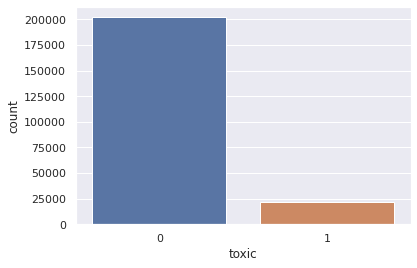

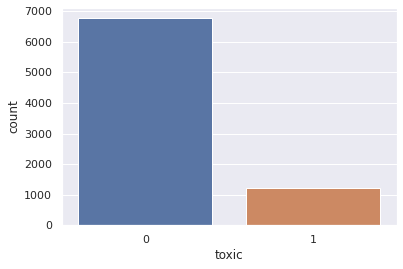

In [12]:
#training_set inspection
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(x=training_set["toxic"])
plt.show()
sns.countplot(x=validation_set["toxic"])
plt.show()

['tr' 'ru' 'it' 'fr' 'pt' 'es']


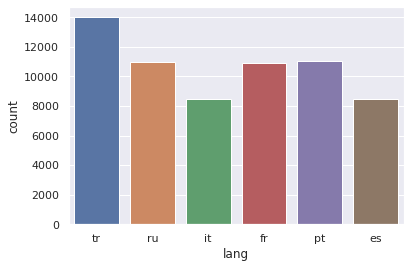

In [13]:
#test_set different language
print(test_set["lang"].unique())
sns.countplot(x=test_set["lang"])
plt.show()

['es' 'it' 'tr']


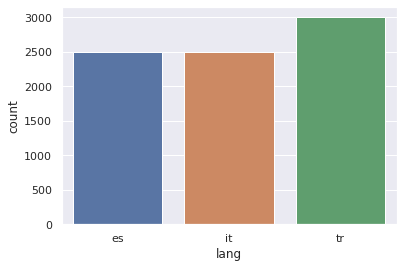

In [14]:
#validation set
print(validation_set["lang"].unique())
sns.countplot(x=validation_set["lang"])
plt.show()

In [15]:
#dropping lang,id  from both dataset
test_set.drop(["lang","id"],axis=1,inplace=True)
validation_set.drop(["lang","id"],axis=1,inplace=True)

In [16]:
import re
def clean_text(text):
    text=text.lower()
    text=re.sub("\n"," ",text)
    text=re.sub("\[\[User.*"," ",text)
    text=re.sub("\(http://.*?\s\(http://.*\)"," ",text)
    text=re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}"," ",text)
    text=re.sub("[.,]"," ",text)
    text=text.split()
    text=" ".join(text)
    return text

In [17]:
training_set["comment_text"]=training_set["comment_text"].apply(str).apply(lambda x:clean_text(x))
test_set["content"]=test_set["content"].apply(str).apply(lambda x:clean_text(x))
validation_set["comment_text"]=validation_set["comment_text"].apply(str).apply(lambda x:clean_text(x))

In [18]:
training_set.head()

,comment_text,toxic
0,explanation why the edits made under my userna...,0
1,d'aww! he matches this background colour i'm s...,0
2,hey man i'm really not trying to edit war it's...,0
3,""" more i can't make any real suggestions on im...",0
4,you sir are my hero any chance you remember wh...,0


In [19]:
test_set.head()

,content
0,doctor who adlı viki başlığına 12 doctor olara...
1,вполне возможно но я пока не вижу необходимост...
2,quindi tu sei uno di quelli conservativi che p...
3,malesef gerçekleştirilmedi ancak şöyle bir şey...
4,:resim:seldabagcan jpg resminde kaynak sorunu ...


In [20]:
validation_set.head()

,comment_text,toxic
0,este usuario ni siquiera llega al rango de her...,0
1,il testo di questa voce pare esser scopiazzato...,0
2,vale sólo expongo mi pasado todo tiempo pasado...,1
3,bu maddenin alt başlığı olarak uluslararası il...,0
4,belçika nın şehirlerinin yanında ilçe ve belde...,0


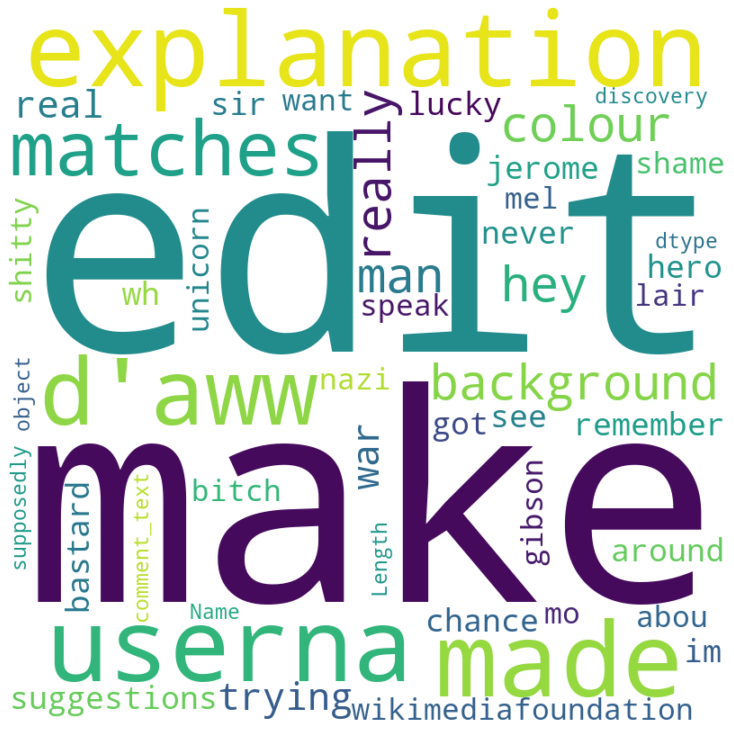

In [21]:
from wordcloud import WordCloud,STOPWORDS
stopwords=set(STOPWORDS)
wc=WordCloud(width=800,height=800,stopwords=stopwords,background_color="white",max_words=100,min_font_size=10).generate(str(training_set["comment_text"]))
plt.figure(figsize=(10,10))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

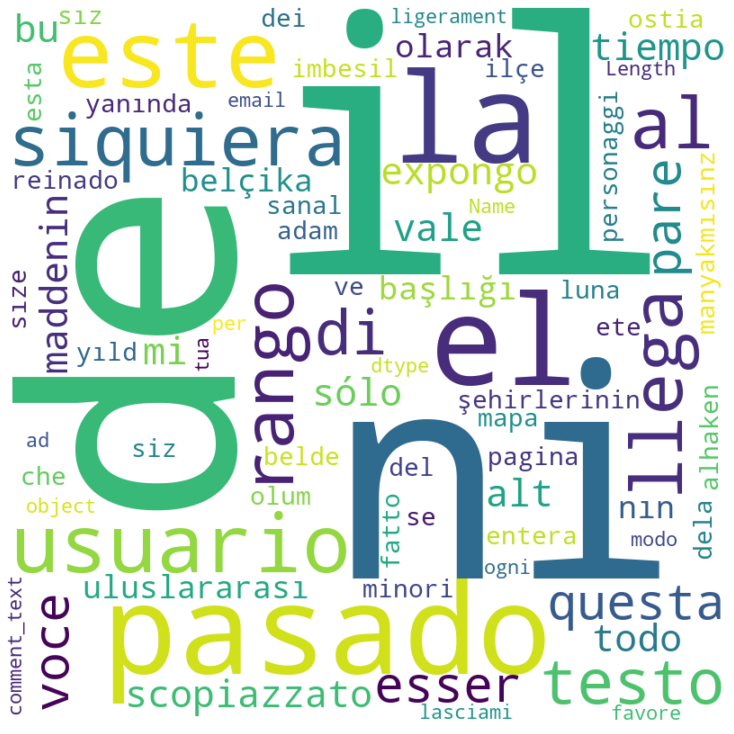

In [22]:
from wordcloud import WordCloud,STOPWORDS
stopwords=set(STOPWORDS)
wc=WordCloud(width=800,height=800,stopwords=stopwords,background_color="white",max_words=100,min_font_size=10).generate(str(validation_set["comment_text"]))
plt.figure(figsize=(10,10))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

In [23]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Flatten
from keras.layers import SimpleRNN
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from kaggle_datasets import KaggleDatasets
import transformers
from transformers import TFAutoModel, AutoTokenizer
from tqdm.notebook import tqdm
from tokenizers import Tokenizer, models, pre_tokenizers, decoders, processors


Using TensorFlow backend.


In [24]:
def fast_encode(texts, tokenizer, chunk_size=256, maxlen=512):
    tokenizer.enable_truncation(max_length=maxlen)
    tokenizer.enable_padding(max_length=maxlen)
    all_ids = []
    
    for i in tqdm(range(0, len(texts), chunk_size)):
        text_chunk = texts[i:i+chunk_size].tolist()
        encs = tokenizer.encode_batch(text_chunk)
        all_ids.extend([enc.ids for enc in encs])
    
    return np.array(all_ids)

In [25]:
def regular_encode(texts, tokenizer, maxlen=512):
    enc_di = tokenizer.batch_encode_plus(
        texts, 
        return_attention_masks=False, 
        return_token_type_ids=False,
        pad_to_max_length=True,
        max_length=maxlen
    )
    
    return np.array(enc_di['input_ids'])

In [26]:
def build_model(transformer, max_len=512):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]
    out = Dense(1, activation='sigmoid')(cls_token)
    
    model = Model(inputs=input_word_ids, outputs=out)
    model.compile(Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [27]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy()

Running on TPU  grpc://10.0.0.2:8470


In [28]:
AUTO = tf.data.experimental.AUTOTUNE
GCS_DS_PATH = KaggleDatasets().get_gcs_path()
EPOCHS = 3
BATCH_SIZE = 16 * strategy.num_replicas_in_sync
MAX_LEN = 256
MODEL = 'jplu/tf-xlm-roberta-large'

In [29]:
tokenizer = AutoTokenizer.from_pretrained(MODEL)

In [30]:
x_train = regular_encode(training_set.comment_text.values, tokenizer, maxlen=MAX_LEN)
x_valid = regular_encode(validation_set.comment_text.values, tokenizer, maxlen=MAX_LEN)
x_test = regular_encode(test_set.content.values, tokenizer, maxlen=MAX_LEN)

y_train = training_set.toxic.values
y_valid = validation_set.toxic.values

In [31]:
train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((x_train, y_train))
    .repeat()
    .shuffle(2048)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

valid_dataset = (
    tf.data.Dataset
    .from_tensor_slices((x_valid, y_valid))
    .batch(BATCH_SIZE)
    .cache()
    .prefetch(AUTO)
)

In [32]:
test_dataset = (
    tf.data.Dataset
    .from_tensor_slices(x_test)
    .batch(BATCH_SIZE)
)

In [33]:
with strategy.scope():
    transformer_layer = TFAutoModel.from_pretrained(MODEL)
    model = build_model(transformer_layer, max_len=MAX_LEN)
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_word_ids (InputLayer)  [(None, 256)]             0         
_________________________________________________________________
tf_roberta_model (TFRobertaM ((None, 256, 1024), (None 559890432 
_________________________________________________________________
tf_op_layer_strided_slice (T [(None, 1024)]            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1025      
Total params: 559,891,457
Trainable params: 559,891,457
Non-trainable params: 0
_________________________________________________________________


In [34]:
n_steps = x_train.shape[0] // BATCH_SIZE
train_history = model.fit(
    train_dataset,
    steps_per_epoch=n_steps,
    validation_data=valid_dataset,
    epochs=EPOCHS
)

Train for 1746 steps, validate for 63 steps
Epoch 1/3


/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:430: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 256002048 elements. This may consume a large amount of memory.
  num_elements)
/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:430: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 256002048 elements. This may consume a large amount of memory.
  num_elements)


1746/1746 [==============================] - 1311s 751ms/step - loss: 0.1163 - accuracy: 0.9546 - val_loss: 0.3731 - val_accuracy: 0.8611
Epoch 2/3
1746/1746 [==============================] - 1080s 618ms/step - loss: 0.0848 - accuracy: 0.9649 - val_loss: 0.4719 - val_accuracy: 0.8639
Epoch 3/3
1746/1746 [==============================] - 1079s 618ms/step - loss: 0.0745 - accuracy: 0.9687 - val_loss: 0.4756 - val_accuracy: 0.8676


In [35]:
n_steps = x_valid.shape[0] // BATCH_SIZE
train_history_2 = model.fit(
    valid_dataset.repeat(),
    steps_per_epoch=n_steps,
    epochs=EPOCHS
)

Train for 62 steps
Epoch 1/3


/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:430: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 256002048 elements. This may consume a large amount of memory.
  num_elements)


62/62 [==============================] - 76s 1s/step - loss: 0.2467 - accuracy: 0.8914
Epoch 2/3
62/62 [==============================] - 116s 2s/step - loss: 0.1575 - accuracy: 0.9268
Epoch 3/3
62/62 [==============================] - 38s 612ms/step - loss: 0.1108 - accuracy: 0.9508


In [36]:
sub['toxic'] = model.predict(test_dataset)
sub.head()
sub.to_csv('submission.csv', index=False)